## Observations and Insights 

* Capomulin drug has been very effective and reduced the growth of Tumor volume with the usage of drug over time as can be observed in plot of Time Point vs Tumor Volume for Capomulin regime.
* The mouse weight growth has positive correlation of 0.84 with average tumor volume growth and since value is very close to 1, it signifies that correlation is very close to being perfect.
* The highest number of mice have been tested using Capomulin follwed closely by Ramicance. The mice count has been on average side for other drugs except for Propriva, the testing has been very poor in case of propriva.
* The perecnetage of male and female mice is almost same (close to 50%), hence the imapct of sex of mice is very low.
* There is only one outlier in case of drug- Infubinol for Tumor Volume sample for final test among the best four drug regimen. This means that Tumor Volume is normally distributed for different mouses in these 4 drugs  'Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'.

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np




In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)



In [3]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [4]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# Combine the data into a single dataset
merged_data_df=pd.merge(mouse_metadata,study_results,on="Mouse ID",how="left")
#merged_data_df.head(100)
merged_data_df.count()



Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [6]:
# Checking the number of mice in the DataFrame.
merged_data_df["Mouse ID"].value_counts()
#merged_data_df[merged_data_df["Mouse ID"]=='k382'].head(20)

g989    13
c559    10
s565    10
a251    10
t718    10
        ..
x226     1
l872     1
t573     1
d133     1
o848     1
Name: Mouse ID, Length: 249, dtype: int64

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#Creating a copy of dataframe for use through out the notebook
training_data_copy=merged_data_df.copy()

training_data_copy[training_data_copy.duplicated(["Mouse ID","Timepoint"],keep=False)]
training_data_copy[training_data_copy.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"]

#Finding the Mouse ID which has duplicate data for a Mouse ID and Timepoint
dup_mouse=training_data_copy.loc[training_data_copy.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"].unique()

dup_mouse

array(['g989'], dtype=object)

In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
#training_data_copy=training_data_copy[~(training_data_copy["Mouse ID"].isin (training_data_copy[training_data_copy.duplicated(["Mouse ID","Timepoint"])]["Mouse ID"]))]
training_data_copy.query('`Mouse ID` not in (@dup_mouse)',inplace=True)

#Renaming column "Tumor Volume (mm3)" to "TumorVolume" for usage later
training_data_copy.rename(columns={"Tumor Volume (mm3)":"TumorVolume"},inplace=True)
training_data_copy.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,TumorVolume,Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
# Checking the number of mice in the clean DataFrame.

training_data_copy["Mouse ID"].nunique()

248

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

regimen_tumor_mean=training_data_copy.groupby('Drug Regimen')["TumorVolume"].mean()

regimen_tumor_median=training_data_copy.groupby('Drug Regimen')["TumorVolume"].median()

regimen_tumor_var=training_data_copy.groupby('Drug Regimen')["TumorVolume"].var()

regimen_tumor_std=training_data_copy.groupby('Drug Regimen')["TumorVolume"].std()

regimen_tumor_sem=training_data_copy.groupby('Drug Regimen')["TumorVolume"].sem()

regimen_tumor_stats=pd.DataFrame({"Tumor Volume Mean":regimen_tumor_mean
                                  ,"Tumor Volume Median":regimen_tumor_median
                                  ,"Tumor Volume Variance":regimen_tumor_var
                                    ,"Tumor Volume Standard Deviation":regimen_tumor_std
                                  ,"Tumor Volume SEM":regimen_tumor_sem
                                })

regimen_tumor_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
regimen_tumor_stats=training_data_copy.groupby('Drug Regimen')["TumorVolume"].agg(["mean","median","var","std","sem"])
regimen_tumor_stats.columns=["Tumor Volume Mean", "Tumor Volume Median","Tumor Volume Variance","Tumor Volume Standard Deviation","Tumor Volume SEM"]
regimen_tumor_stats



,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

(138, 240)

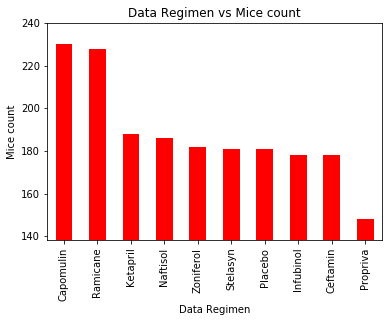

In [12]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.

mouse_count_regimen=pd.DataFrame(training_data_copy["Drug Regimen"].value_counts())
#mouse_count_regimen.reset_index(inplace=True)
mouse_count_regimen.columns=['Mouse Count']


#Plot graph
ax=mouse_count_regimen.plot(kind="bar",facecolor="red",legend=False,title="Mice Count vs Data Regimen"\
                         ,label=["Data Regimen","Mice count"])
#Set x-label, y-label and title for the chart
ax.set_xlabel("Data Regimen")
ax.set_ylabel("Mice count")
ax.set_title("Data Regimen vs Mice count")

#Set ylim
ax.set_ylim(min(mouse_count_regimen["Mouse Count"])-10,max(mouse_count_regimen["Mouse Count"])+10)

 



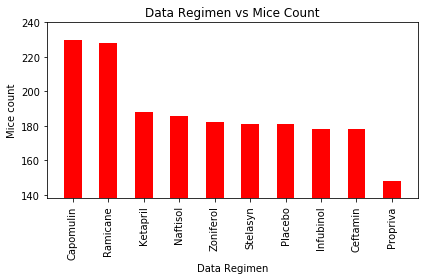

In [13]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis=np.arange(training_data_copy["Drug Regimen"].nunique())
#print(x_axis)

mouse_count_regimen=pd.DataFrame(training_data_copy["Drug Regimen"].value_counts())
mouse_count_regimen.reset_index(inplace=True)
mouse_count_regimen.columns=['Drug Regimen','Mouse Count']


#Plot graph
plt.bar(x_axis,mouse_count_regimen["Mouse Count"],color='r',alpha=1.0,align='center',width=0.5)

#Set tick locations
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_count_regimen["Drug Regimen"],rotation=90)

#Set x-label, y-label and title for the chart
plt.title("Data Regimen vs Mice Count")
plt.xlabel("Data Regimen")
plt.ylabel("Mice count")

#Set ylim
plt.ylim(min(mouse_count_regimen["Mouse Count"])-10,max(mouse_count_regimen["Mouse Count"])+10)

#Fit the chart
plt.tight_layout()

plt.show()



## Pie Plots

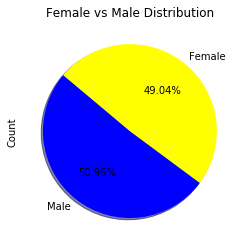

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex_df=pd.DataFrame(training_data_copy['Sex'].value_counts())
#mice_sex_df.reset_index(inplace=True)
mice_sex_df.columns=["Count"]
#mice_sex_df.head()

#Plot parameters
colors=['blue','yellow']

mice_sex_df.plot(kind="pie",y="Count",colors=colors,autopct="%1.2f%%", 
                 shadow=True, startangle=140,legend=False,title="Female vs Male Distribution")


Text(0.5, 1.0, 'Female vs Male Distribution')

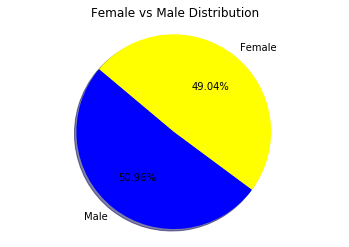

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex_df=pd.DataFrame(training_data_copy['Sex'].value_counts())
mice_sex_df.reset_index(inplace=True)
mice_sex_df.columns=["Sex","Count"]
#mice_sex_df.head()

#Plot graph
plt.pie(mice_sex_df["Count"],labels=mice_sex_df["Sex"],colors=colors
       ,autopct="%1.2f%%", shadow=True, startangle=140)

# Create axes which are equal so we have a perfect circle
plt.axis("equal")

#Set x-label, y-label and title for the chart
plt.title("Female vs Male Distribution")


## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

best_regimen=['Capomulin','Ramicane','Infubinol','Ceftamin']

#create dataframe that contains data for 4 most promising treatment regimens:Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_vol_best_df=training_data_copy.loc[(training_data_copy['Drug Regimen'].isin (best_regimen))]\
                                        .groupby(["Mouse ID","Drug Regimen"]).last().reset_index()

for i in range(len(best_regimen)):

    #Sort the values on Tumor Volume
    tumor_vol_best_sorted_df=tumor_vol_best_df.loc[tumor_vol_best_df["Drug Regimen"]==best_regimen[i]].sort_values("TumorVolume")
    #Calculate quartiles and inter-quartile range
    quartiles=tumor_vol_best_sorted_df["TumorVolume"].quantile([0.25,0.5,0.75])
    lowerq=quartiles[0.25]
    upperq=quartiles[0.75]
    iqr=upperq-lowerq

    print(f"The value of lower quartile is: {lowerq}")

    print(f"The value of upper quartile is: {upperq}")

    print(f"The value of Inter-quartile range is: {iqr}")

    #Calculate lower and upper boundary for whiskers and to identify values which are outliers
    lower_bound=lowerq-(1.5*iqr)

    upper_bound=upperq+(1.5*iqr)

    print(f"The values above {upper_bound} and below {lower_bound} are outliers")

    #Calculate outliers in the dataset
    outliers_df=pd.DataFrame(tumor_vol_best_sorted_df.loc[(tumor_vol_best_sorted_df["TumorVolume"]<lower_bound) | (tumor_vol_best_sorted_df["TumorVolume"]>upper_bound)][["Mouse ID","TumorVolume",'Drug Regimen']])

    len(outliers_df['Mouse ID'])

    if (len(outliers_df['Mouse ID'])==0):
        print(f"No outlier in {best_regimen[i]}" )
    else:
        for index in range(len(outliers_df['Mouse ID'])):
            print(f"Mouse id: {outliers_df.iloc[index]['Mouse ID']} in Drug Regimen {outliers_df.iloc[index]['Drug Regimen']} is an outlier with tumor volume: {outliers_df.iloc[index]['TumorVolume']}")
    
    print("---------------------------------------------------------------------\n")

The value of lower quartile is: 32.37735684
The value of upper quartile is: 40.1592203
The value of Inter-quartile range is: 7.781863460000004
The values above 51.83201549 and below 20.70456164999999 are outliers
No outlier in Capomulin
---------------------------------------------------------------------

The value of lower quartile is: 31.56046955
The value of upper quartile is: 40.65900627
The value of Inter-quartile range is: 9.098536719999998
The values above 54.30681135 and below 17.912664470000003 are outliers
No outlier in Ramicane
---------------------------------------------------------------------

The value of lower quartile is: 54.04860769
The value of upper quartile is: 65.52574285
The value of Inter-quartile range is: 11.477135160000003
The values above 82.74144559000001 and below 36.83290494999999 are outliers
Mouse id: c326 in Drug Regimen Infubinol is an outlier with tumor volume: 36.321345799999996
---------------------------------------------------------------------

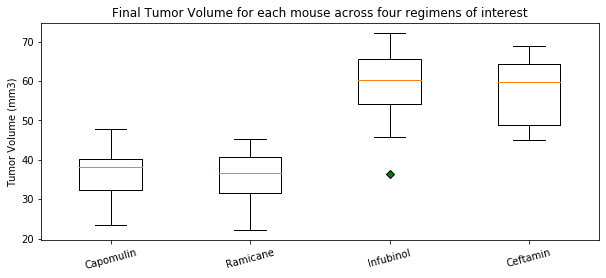

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#Capomulin, Ramicane, Infubinol, and Ceftamin
plt.figure(figsize=(10,4))
plt.title('Final Tumor Volume for each mouse across four regimens of interest')
plt.ylabel('Tumor Volume (mm3)')
#print(tumor_vol_best_df["TumorVolume"])
#ax1.boxplot(tumor_vol_best_df[tumor_vol_best_df["Drug Regimen"]=="Capomulin"]["TumorVolume"])

filerprops = dict(markerfacecolor='g', marker='D')

plt.boxplot([tumor_vol_best_df.loc[tumor_vol_best_df["Drug Regimen"]=='Capomulin']["TumorVolume"]
            ,tumor_vol_best_df.loc[tumor_vol_best_df["Drug Regimen"]=='Ramicane']["TumorVolume"]
            ,tumor_vol_best_df.loc[tumor_vol_best_df["Drug Regimen"]=='Infubinol']["TumorVolume"]
            ,tumor_vol_best_df.loc[tumor_vol_best_df["Drug Regimen"]=='Ceftamin']["TumorVolume"]
            ], flierprops=filerprops
           )
plt.xticks(range(1,5),best_regimen, rotation=15)


plt.show()

## Line and Scatter Plots

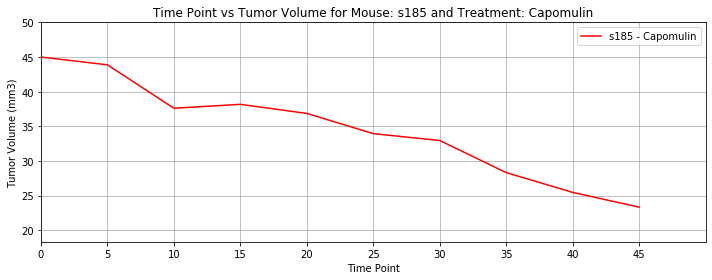

In [18]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
#training_data_copy.columns
#List of mouse ids treated with Capmoulin
mouse_list_capomulin=[mouse for mouse in training_data_copy.loc[(training_data_copy['Drug Regimen']=='Capomulin')]["Mouse ID"].unique()]
#mouse_list_capomulin

#Dataframe of data treated with Capomulin for a MouseID containing columns Timepoint and Tumor Volume
tumor_vol_timepoint_capomulin_df=training_data_copy.loc[(training_data_copy['Drug Regimen']=='Capomulin')
                                                        &(training_data_copy['Mouse ID']==mouse_list_capomulin[0])]\
                                                        [['Timepoint','TumorVolume']].reset_index(drop=True)
#tumor_vol_timepoint_capomulin_df

#Defining size of plot
plt.figure(figsize=(10,4))

#Line plot for timepoint vs tumor Volume for a mouse treated with Campolin
mouse_drug,=plt.plot(tumor_vol_timepoint_capomulin_df["Timepoint"],tumor_vol_timepoint_capomulin_df["TumorVolume"]
        ,color="red"
        ,label=mouse_list_capomulin[0]+" - Capomulin")

#tumor_vol_timepoint_capomulin_df["Timepoint"]

#Set x-label, y-label and title for the chart
plt.title(f"Time Point vs Tumor Volume for Mouse: {mouse_list_capomulin[0]} and Treatment: Capomulin")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(min(tumor_vol_timepoint_capomulin_df["Timepoint"]),max(tumor_vol_timepoint_capomulin_df["Timepoint"])+5,5))

#Add grid lines
plt.grid()

#Set location for labels
plt.legend(handles=[mouse_drug],loc="best")

#Set xlim and ylim
plt.xlim(min(tumor_vol_timepoint_capomulin_df["Timepoint"]),max(tumor_vol_timepoint_capomulin_df["Timepoint"])+5)
plt.ylim(min(tumor_vol_timepoint_capomulin_df["TumorVolume"])-5,max(tumor_vol_timepoint_capomulin_df["TumorVolume"])+5)

#Fit the chart
plt.tight_layout()

plt.show()


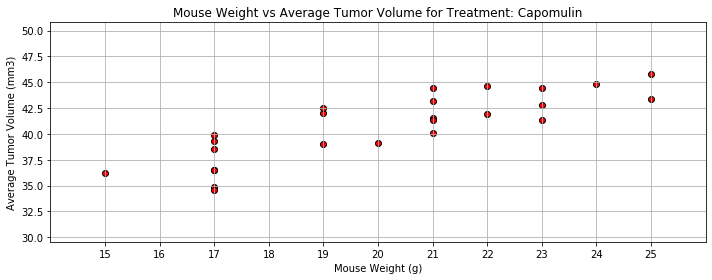

In [19]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

#training_data_copy.columns

#Dataframe of data treated with Capomulin for all mouse containing columns Weight (g) and Tumor Volume
tumor_vol_weight_capomulin_df= training_data_copy.loc[(training_data_copy['Drug Regimen']=='Capomulin')]\
                            .groupby("Mouse ID").mean()

#tumor_vol_weight_capomulin_df

plt.figure(figsize=(10,4))

#Scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(tumor_vol_weight_capomulin_df["Weight (g)"],tumor_vol_weight_capomulin_df["TumorVolume"],
            marker="o", facecolors="red", edgecolors="black")

#Set x-label, y-label and title for the chart
plt.title("Mouse Weight vs Average Tumor Volume for Treatment: Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xticks(np.arange(min(tumor_vol_weight_capomulin_df["Weight (g)"]),max(tumor_vol_weight_capomulin_df["Weight (g)"])+1,1))

#Set xlim and ylim
plt.xlim(min(tumor_vol_weight_capomulin_df["Weight (g)"])-1,max(tumor_vol_weight_capomulin_df["Weight (g)"])+1)
plt.ylim(min(tumor_vol_weight_capomulin_df["TumorVolume"])-5,max(tumor_vol_weight_capomulin_df["TumorVolume"])+5)


plt.grid()

#Fit the chart
plt.tight_layout()

plt.show()





## Correlation and Regression

The correlation coefficient is 0.84


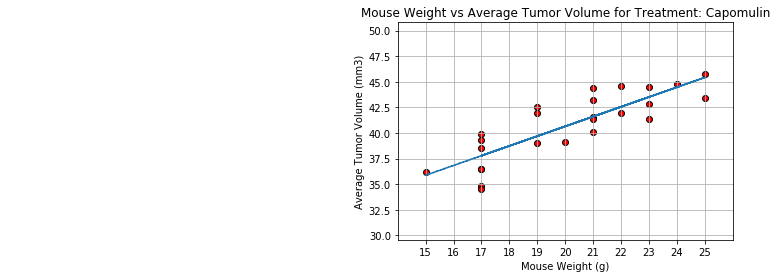

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

mouse_weight=tumor_vol_weight_capomulin_df["Weight (g)"]
avg_tumor_vol=tumor_vol_weight_capomulin_df["TumorVolume"]
correlation = st.pearsonr(mouse_weight,avg_tumor_vol)
print(f"The correlation coefficient is {round(correlation[0],2)}")

# Perform a linear regression on mouse weight versus Average Tumor Volume
slope, intercept, r, p, std_err = st.linregress(mouse_weight, avg_tumor_vol)

# Create equation of line
fit = slope * mouse_weight + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


#Scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(tumor_vol_weight_capomulin_df["Weight (g)"],tumor_vol_weight_capomulin_df["TumorVolume"],
            marker="o", facecolors="red", edgecolors="black")

#Plot linear regression

plt.plot(mouse_weight,fit,"--")

#Show linear regression equation

plt.annotate(line_eq,(0,30),fontsize=15,color="red")

#Set x-label, y-label and title for the chart
plt.title("Mouse Weight vs Average Tumor Volume for Treatment: Capomulin")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.xticks(np.arange(min(tumor_vol_weight_capomulin_df["Weight (g)"]),max(tumor_vol_weight_capomulin_df["Weight (g)"])+1,1))

#Set xlim and ylim
plt.xlim(min(tumor_vol_weight_capomulin_df["Weight (g)"])-1,max(tumor_vol_weight_capomulin_df["Weight (g)"])+1)
plt.ylim(min(tumor_vol_weight_capomulin_df["TumorVolume"])-5,max(tumor_vol_weight_capomulin_df["TumorVolume"])+5)


plt.grid()


plt.show()

